# CTM MILP Formulation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from pprint import pprint
import time

from ctmmodels.const import *
from ctmmodels.altphasing import Constraint6AltPhasingModel

## Using the Module

In [2]:
# model1 = Constraint5Model(
#     sat_flow_rate=600,
#     demand=450,
# )
# model1.generate()

model2 = Constraint6AltPhasingModel(
    r_left=0.3,
    r_through=0.4,
    r_right=0.3
)
model2.generate()

In [3]:
print("New:")
model2.solve(log_output=True)

New:
Solving...
CPXPARAM_Read_DataCheck                          1
Tried aggregator 2 times.
MIP Presolve eliminated 2452 rows and 412 columns.
MIP Presolve modified 768 coefficients.
Aggregator did 388 substitutions.
Reduced MIP has 2710 rows, 1480 columns, and 10820 nonzeros.
Reduced MIP has 240 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.02 sec. (13.04 ticks)
Found incumbent of value 2480.000000 after 0.04 sec. (29.33 ticks)
Probing fixed 0 vars, tightened 140 bounds.
Probing time = 0.00 sec. (0.58 ticks)
Tried aggregator 2 times.
MIP Presolve eliminated 536 rows and 104 columns.
Aggregator did 40 substitutions.
Reduced MIP has 2134 rows, 1336 columns, and 9296 nonzeros.
Reduced MIP has 240 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.01 sec. (7.54 ticks)
Probing time = 0.00 sec. (1.25 ticks)
Clique table members: 120.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up

1.3151028156280518

## Showing the Cell Capacities

In [4]:
model = model2

In [5]:
df_x, df_y, df_g = model.return_solution()

In [6]:
df_x_source = df_x[df_x.cell == (CELL_SOURCE,0,1)].sort_values(by='timestep')
df_x_normal0 = df_x[df_x.cell == (CELL_NORMAL,0,1)].sort_values(by='timestep')
df_x_normal1 = df_x[df_x.cell == (CELL_NORMAL,1,1)].sort_values(by='timestep')
df_x_normal2 = df_x[df_x.cell == (CELL_NORMAL,2,1)].sort_values(by='timestep')
df_x_left = df_x[df_x.cell == (CELL_MOVEMENT,THROUGH_TURN,1)].sort_values(by='timestep')
df_x_sink = df_x[df_x.cell == model.S[(CELL_MOVEMENT,THROUGH_TURN,1)][0]].sort_values(by='timestep')

df_x_approach = df_x_source.append(df_x_normal1).append(df_x_normal2).append(df_x_normal0).append(df_x_left).append(df_x_sink)
df_x_approach = df_x_approach.pivot(index='timestep', columns='cell', values='volume')
df_x_approach

cell,"(0, 0, 1)","(1, 0, 3)","(2, 1, 1)","(3, 0, 1)","(3, 1, 1)","(3, 2, 1)"
timestep,,,,,,
0,1.333333,0.00,0.000000,0.0,0.0,0.000000
1,1.666667,0.00,0.000000,1.0,0.0,0.000000
2,2.000000,0.00,0.000000,1.0,1.0,0.000000
3,2.333333,0.00,0.000000,1.0,1.0,1.000000
4,2.666667,0.00,0.333333,1.0,1.0,1.166667
5,3.000000,0.25,0.666667,1.0,1.0,1.333333
6,3.333333,0.25,0.750000,1.0,1.0,1.500000
7,3.666667,0.50,0.583333,1.0,1.0,1.666667
8,4.000000,0.50,0.416667,1.0,1.0,1.833333


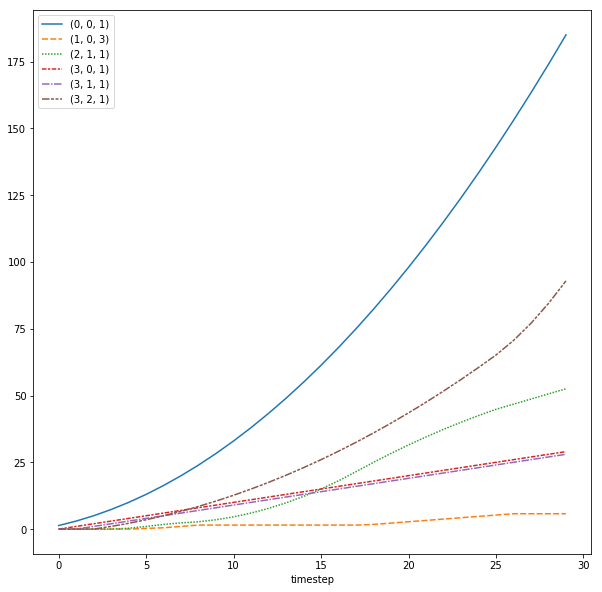

In [7]:
_, ax = plt.subplots(figsize=(10,10))
sns.lineplot(data=df_x_approach.cumsum())

This linear, cascading cumulative sum of consecutive cells (except for the through cell) means that the turning ratio is working fine.

In [8]:
df_y_source = df_y[df_y.cell_from == (CELL_SOURCE,0,1)].groupby(['cell_from', 'timestep']).agg({'flow': 'sum'}).sort_values(by='timestep')
df_y_normal0 = df_y[df_y.cell_from == (CELL_NORMAL,0,1)].groupby(['cell_from', 'timestep']).agg({'flow': 'sum'}).sort_values(by='timestep')
df_y_normal1 = df_y[df_y.cell_from == (CELL_NORMAL,1,1)].groupby(['cell_from', 'timestep']).agg({'flow': 'sum'}).sort_values(by='timestep')
df_y_normal2 = df_y[df_y.cell_from == (CELL_NORMAL,2,1)].groupby(['cell_from', 'timestep']).agg({'flow': 'sum'}).sort_values(by='timestep')
df_y_normal2 = df_y[df_y.cell_from == (CELL_NORMAL,2,1)].groupby(['cell_from', 'timestep']).agg({'flow': 'sum'}).sort_values(by='timestep')
df_y_left = df_y[df_y.cell_from == (CELL_MOVEMENT,THROUGH_TURN,1)].groupby(['cell_from', 'timestep']).agg({'flow': 'sum'}).sort_values(by='timestep')
df_y_sink = df_y[df_y.cell_from == model.S[(CELL_MOVEMENT,THROUGH_TURN,1)][0]].groupby(['cell_from', 'timestep']).agg({'flow': 'sum'}).sort_values(by='timestep')

df_y_approach = df_y_source.append(df_y_normal1).append(df_y_normal2).append(df_y_normal0).append(df_y_left).append(df_y_sink)
df_y_approach.reset_index(inplace=True)
df_y_approach = df_y_approach.pivot(index='timestep', columns='cell_from', values='flow')
df_y_approach

cell_from,"(0, 0, 1)","(2, 1, 1)","(3, 0, 1)","(3, 1, 1)","(3, 2, 1)"
timestep,,,,,
0,1.0,0.00,0.0,0.0,0.000000
1,1.0,0.00,1.0,0.0,0.000000
2,1.0,0.00,1.0,1.0,0.000000
3,1.0,0.00,1.0,1.0,0.833333
4,1.0,0.00,1.0,1.0,0.833333
5,1.0,0.25,1.0,1.0,0.833333
6,1.0,0.50,1.0,1.0,0.833333
7,1.0,0.50,1.0,1.0,0.833333
8,1.0,0.00,1.0,1.0,0.833333


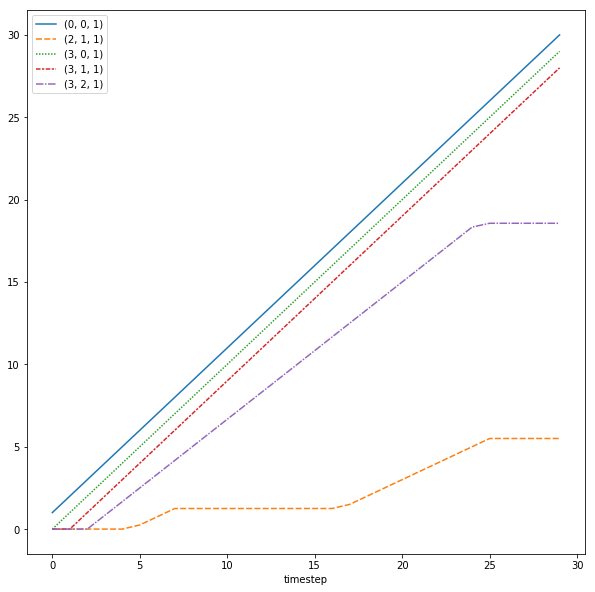

In [9]:
_, ax = plt.subplots(figsize=(10,10))
sns.lineplot(data=df_y_approach.cumsum())

### Comparing the Green Signal and the Flow

In [10]:
df_g_specific = df_g[df_g.cell == (1,0,1)].sort_values(by='timestep')
df_g_specific.cell = df_g_specific.cell.apply(lambda x: (CELL_MOVEMENT,THROUGH_TURN,1))
df_y_specific = df_y[(df_y.cell_from == (CELL_MOVEMENT,THROUGH_TURN,1)) & (df_y.cell_to == model.S[(CELL_MOVEMENT,THROUGH_TURN,1)][0])].sort_values(by='timestep')
df_y_specific = df_y_specific.groupby(['timestep', 'cell_from']).agg({'flow': 'sum'}).reset_index()

df_g_y = pd.merge(df_g_specific, df_y_specific, left_on=['timestep', 'cell'], right_on=['timestep', 'cell_from'])[
    ['timestep', 'is_green', 'flow']
]

df_g_y.set_index('timestep', inplace=True)

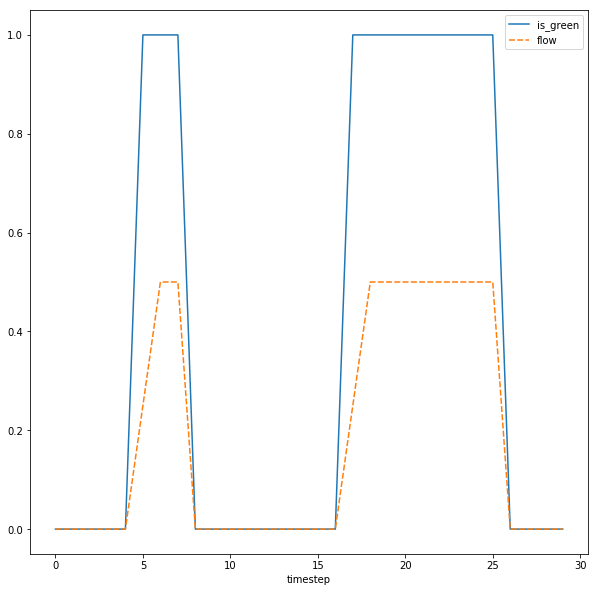

In [11]:
_, ax = plt.subplots(figsize=(10,10))
sns.lineplot(data=df_g_y)

## Checking the green times of the 8 phases

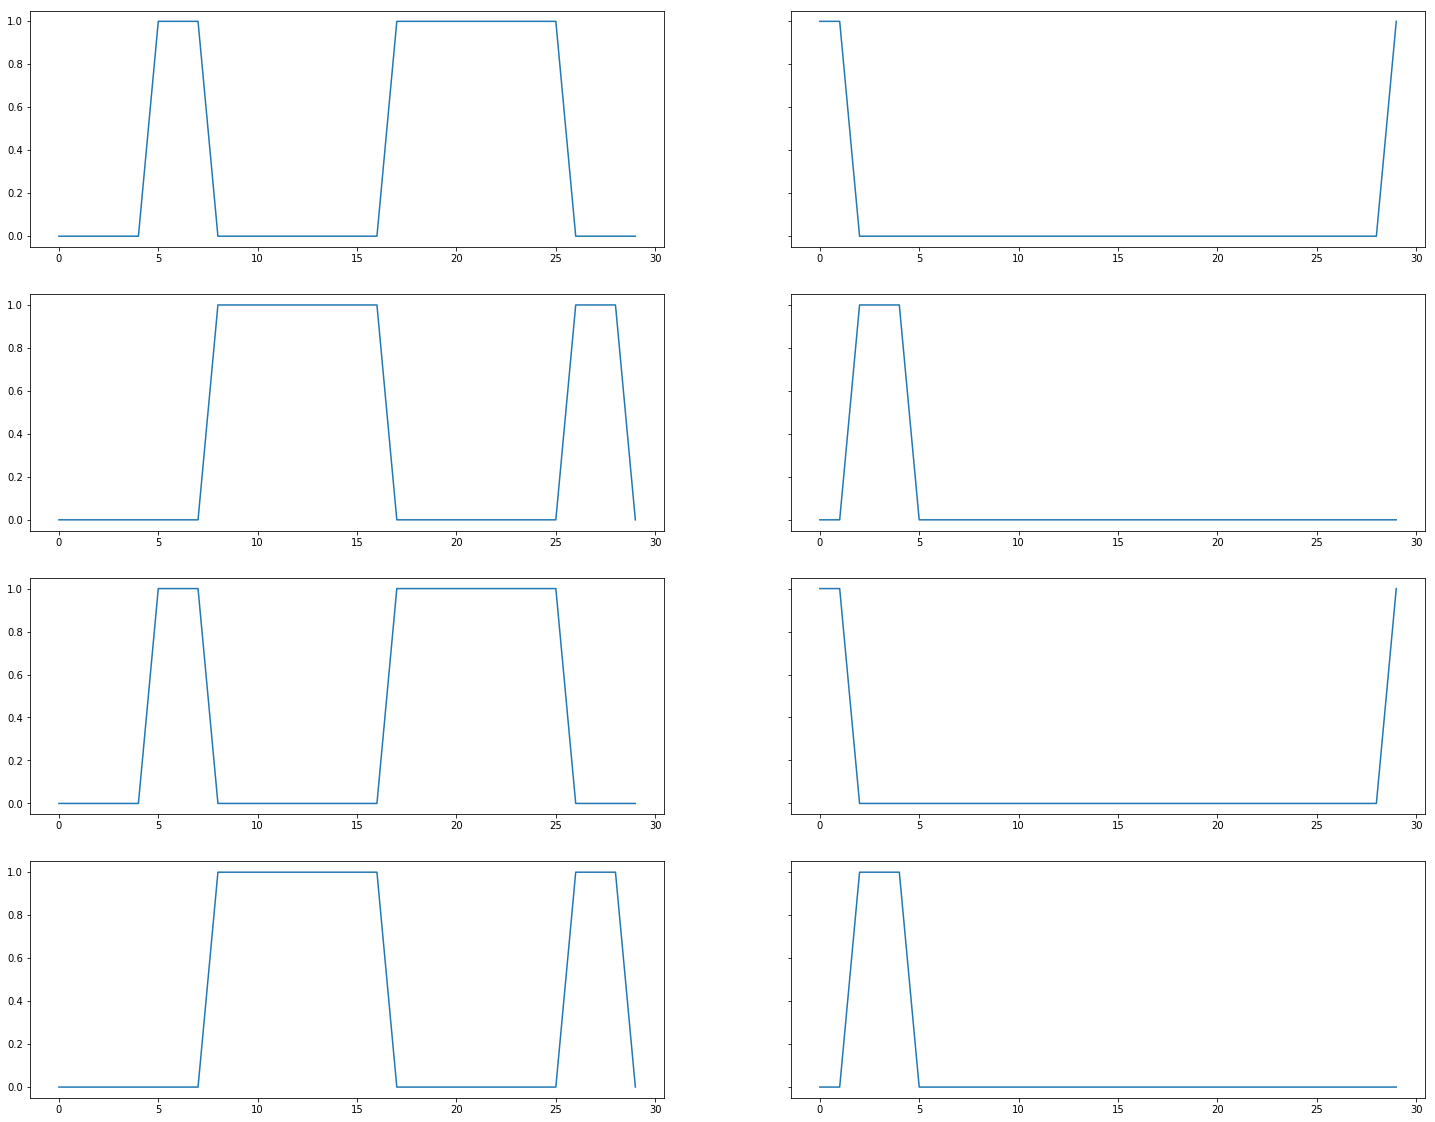

In [12]:
df_g_map = df_g.pivot(index='timestep', columns='cell', values='is_green')
throughs = [intToBinTuple(x) for x in [1,3,5,7]]
lefts = [intToBinTuple(x) for x in [0,2,4,6]]

_, axs = plt.subplots(4,2,figsize=(25,20), sharey=True)

for ndx, t in enumerate(throughs):
    sns.lineplot(data=df_g_map[t], ax=axs[ndx][0])
    
for ndx, l in enumerate(lefts):
    sns.lineplot(data=df_g_map[l], ax=axs[ndx][1])